**IMPORT LIBRARIES**

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from pyhht import EMD
from scipy.stats import norm
from scipy.stats import entropy
from tqdm import tqdm

**IMPORT DATA**

In [2]:

def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

files = []
for n in range(1, 33): 
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    files.append(s)
# print(files)

labels = []
data = []
for i in files: 
    fileph = "C://Users//Hello//Desktop//THESIS//project//data_preprocessed//s" + i + ".dat"
    d = read_data(fileph)
    labels.append(d['labels'])
    data.append(d['data'])  #32,40,40,8064

In [ ]:
################# FOR 1 SUBJECT ##################
'''
import pickle
# import numpy as np
def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

labels = []
data = []
# for i in files: 
i = '01'
filepath = "./data_preprocessed/s" + i + ".dat"
d = read_data(filepath)
labels = d['labels']
data = d['data']  #32,40,40,8064
data = np.array(data)'''

In [3]:
data = np.array(data)
data.shape

(32, 40, 40, 8064)

In [4]:
# data for all 32 subjects,40 trials,32 channels,7680 datapoints i.e,removing 3 sec basline
eeg_data = data[:,:,:32,384:8064]
eeg_data.shape

(32, 40, 32, 7680)

In [5]:
len(eeg_data)

32

In [2]:
#!pip install pyhht
#from pyhht import EMD

**FILTERING THE SIGNAL**

In [7]:

# Define filter parameters
lowcut = 2 # Hz
highcut = 45 # Hz
fs = 128 # Hz
order = 5 # Butterworth filter order

# Define function to create bandpass Butterworth filter coefficients
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band',analog='False')
    return b, a

filtered_data = np.zeros_like(eeg_data)
for i in range(32):
    for j in range(40):
        for k in range(32):
            filtered_data[i, j, k, :] = filtfilt(*butter_bandpass(lowcut, highcut, fs, order),
                                                 eeg_data[i, j, k, :])


# The filtered data is stored in the 'filtered_data' array
'''Here, butter_bandpass is a function that creates the filter coefficients for a bandpass Butterworth filter of the specified order,
 with cutoff frequencies of lowcut and highcut, and a sampling frequency of fs. 
 The filtfilt function applies the filter forwards and backwards to remove any phase distortion.
We loop over the first three dimensions of data (32 subjects, 40 videos, 32 channels), 
and apply the Butterworth filter to each channel using the filtfilt function from scipy.signal.
Note that the resulting filtered_data array will have the same shape as the original eeg_data array. 
but with the EEG signal filtered in the frequency range [2, 45] Hz.'''

'Here, butter_bandpass is a function that creates the filter coefficients for a bandpass Butterworth filter of the specified order,\n with cutoff frequencies of lowcut and highcut, and a sampling frequency of fs. \n The filtfilt function applies the filter forwards and backwards to remove any phase distortion.\nWe loop over the first three dimensions of data (32 subjects, 40 videos, 32 channels), \nand apply the Butterworth filter to each channel using the filtfilt function from scipy.signal.\nNote that the resulting filtered_data array will have the same shape as the original eeg_data array. \nbut with the EEG signal filtered in the frequency range [2, 45] Hz.'

In [8]:
filtered_data.shape

(32, 40, 32, 7680)

In [ ]:
dat = filtered_data[0][0]
decomposer = EMD(dat.ravel())
imfs = decomposer.decompose()
imfs.shape


Mode 3, Iteration 600
5 minima > 0; 29677 maxima < 0.
Mode 3, Iteration 800
0 minima > 0; 30132 maxima < 0.
Mode 4, Iteration 1000
4 minima > 0; 17353 maxima < 0.
Mode 4, Iteration 1200
1 minima > 0; 17614 maxima < 0.
Mode 5, Iteration 1400
1 minima > 0; 10523 maxima < 0.
Mode 5, Iteration 1600
0 minima > 0; 10649 maxima < 0.
Mode 6, Iteration 1800
1 minima > 0; 6728 maxima < 0.


c:\Users\Hello\anaconda3\lib\site-packages\pyhht\emd.py:367: UserWarning: Emd:warning, Forced stop of sifting - Maximum iteration limit reached.
  warnings.warn("Emd:warning, Forced stop of sifting - " +


(9, 245760)

In [9]:
filtered_data.shape

(32, 40, 32, 7680)

**CHANNEL WISE DECOMPOSITION OF SIGNAL**

In [14]:
#(32, 40, 32, 7680)
from tqdm import tqdm
for subj in tqdm(range(filtered_data.shape[0])):  # loop over all subjects
    fil_data = []
    for vid in tqdm(range(filtered_data.shape[1])):  # loop over all videos for the current subject
        vid_data = []
        for chl in range(filtered_data.shape[2]):  # loop over all channels for the current video
            decomposer = EMD(filtered_data[subj, vid, chl], n_imfs=4)
            imfs = decomposer.decompose()
            vid_data.append(imfs)
        fil_data.append(vid_data)
    fil_data = np.array(fil_data)
    np.save(f'imfs_data_subj_{subj+1}.npy', fil_data)  # save the decomposition for the current subject in a separate file

 12%|█▎        | 4/32 [28:04<3:17:33, 423.33s/it]

Mode 4, Iteration 600
1 minima > 0; 368 maxima < 0.
Mode 4, Iteration 600
0 minima > 0; 245 maxima < 0.


 34%|███▍      | 11/32 [1:24:12<2:53:16, 495.09s/it]

Mode 4, Iteration 600
0 minima > 0; 265 maxima < 0.
Mode 4, Iteration 800
0 minima > 0; 265 maxima < 0.


 50%|█████     | 16/32 [2:25:06<3:12:22, 721.44s/it]

Mode 4, Iteration 600
2 minima > 0; 361 maxima < 0.
Mode 4, Iteration 800
1 minima > 0; 363 maxima < 0.
Mode 4, Iteration 1000
1 minima > 0; 363 maxima < 0.


 53%|█████▎    | 17/32 [2:32:19<2:38:40, 634.70s/it]

Mode 3, Iteration 600
1 minima > 0; 510 maxima < 0.
Mode 3, Iteration 800
1 minima > 0; 513 maxima < 0.
Mode 3, Iteration 1000
1 minima > 0; 518 maxima < 0.


 56%|█████▋    | 18/32 [2:39:13<2:12:39, 568.52s/it]

Mode 4, Iteration 600
1 minima > 0; 255 maxima < 0.


 84%|████████▍ | 27/32 [3:36:08<30:41, 368.29s/it]

Mode 4, Iteration 600
0 minima > 0; 431 maxima < 0.


 91%|█████████ | 29/32 [3:49:11<19:00, 380.15s/it]

Mode 3, Iteration 600
0 minima > 0; 583 maxima < 0.
Mode 3, Iteration 800
0 minima > 0; 584 maxima < 0.


Mode 2, Iteration 600
1 minima > 0; 1093 maxima < 0.
Mode 3, Iteration 800
0 minima > 0; 628 maxima < 0.
Mode 3, Iteration 1000
0 minima > 0; 638 maxima < 0.


100%|██████████| 32/32 [4:07:43<00:00, 464.47s/it]


In [26]:
imfs_data32 = np.load('imfs_data_subj_32.npy')
imfs_data31= np.load('imfs_data_subj_31.npy')
# Print the shape of the data (40, 32, 5, 7680)

print(imfs_data31)

[[[[ 6.95131057e-02 -4.71177655e-01  6.37329747e-01 ... -1.47124115e-02
    -2.41687711e-01 -1.52861177e-01]
   [ 1.28273585e-01  9.52202343e-02  1.15846531e-02 ...  1.17691851e-01
     1.93340169e-01  2.22001289e-01]
   [ 4.53290561e-02  4.66452386e-02  5.36179496e-02 ...  1.76629283e-02
     1.25973827e-02  7.45439659e-03]
   [-2.89848661e-01 -2.88077219e-01 -2.85428545e-01 ...  7.71584788e-02
     8.56459667e-02  9.08580535e-02]
   [ 4.90846939e-02  4.88341639e-02  4.84947463e-02 ... -1.63096340e-01
    -1.65133622e-01 -1.66685683e-01]]

  [[-3.95984669e-02 -2.93038239e-01  6.58508494e-02 ... -2.04116114e-01
     2.10638329e-01  4.49839120e-02]
   [ 6.27868568e-02  5.64626140e-02  3.69596385e-02 ... -1.82095888e-02
    -3.98309851e-02 -4.59877670e-02]
   [ 9.60906347e-03  1.00361596e-02  1.17890407e-02 ...  2.44504270e-02
     2.70354794e-02  2.88270444e-02]
   [-7.82854598e-02 -7.83948946e-02 -7.82011653e-02 ...  3.62848303e-02
     3.53597879e-02  3.44365803e-02]
   [ 4.46614628e-

In [16]:
fil_data.shape  

(40, 32, 5, 7680)

**Visualization of the original and decomposed signals**

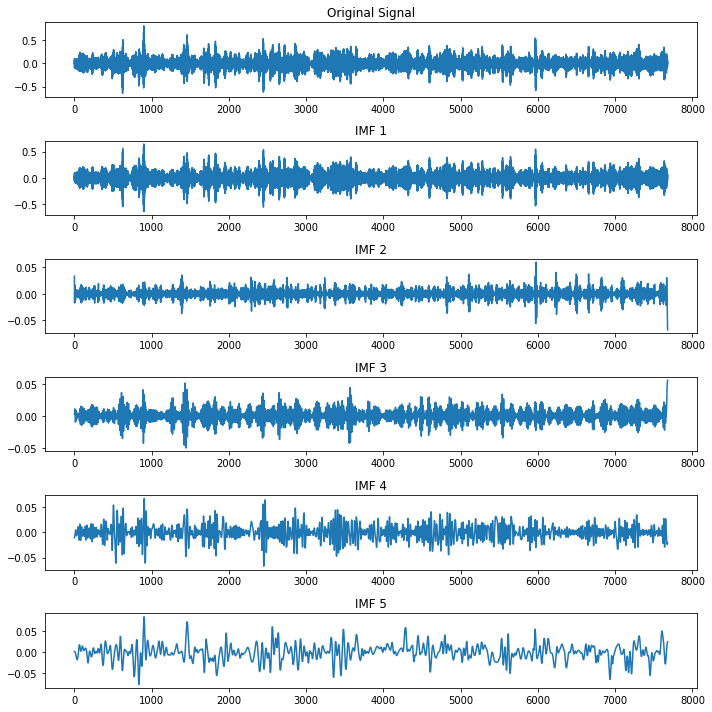

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load the EEG data
eeg_data = filtered_data

# Load the saved IMF data for a given subject
imfs_data = np.load('imfs_data_subj_1.npy')

# Select a video, channel, and subject
vid = 0
chl = 0
subj = 0

# Get the original signal and its IMFs
orig_signal = eeg_data[subj, vid, chl, :]
imfs = imfs_data[vid, chl]

# Plot the original signal and its IMFs
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

# Plot the original signal
axs[0].plot(orig_signal)
axs[0].set_title('Original Signal')

# Plot each of the IMFs
for i in range(5):
    axs[i+1].plot(imfs[i])
    axs[i+1].set_title(f'IMF {i+1}')

plt.tight_layout()
plt.show()



In [6]:
# Declaring Gaussian Normalization function
def gaussian_normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    gaussian = norm.cdf(data, mean, std)
    return gaussian

**FEATURE EXTRACTION**

In [7]:
#imfs_data_subj shape(40, 32, 5, 7680)

#Entropy feature extraction for all subjects
for sub in tqdm(range(32)):
    imfs=np.load(f'imfs_data_subj_{sub+1}.npy')
    # Resizing the IMFs to their original shape of the signals (eeg_data)
    imf1 = imfs[:, :, 0, :].reshape(40, 32, 7680)
    imf2 = imfs[:, :, 1, :].reshape(40, 32, 7680)
    imf3 = imfs[:, :, 2, :].reshape(40, 32, 7680)
    imf4 = imfs[:, :, 3, :].reshape(40, 32, 7680)
    imf5 = imfs[:, :, 4, :].reshape(40, 32, 7680)

    eeg_imf1=[[['1']*29]*len(imf1[0])]*len(imf1)
    eeg_imf2=[[['1']*29]*len(imf2[0])]*len(imf2)
    eeg_imf3=[[['1']*29]*len(imf3[0])]*len(imf3)
    eeg_imf4=[[['1']*29]*len(imf4[0])]*len(imf4)
    eeg_imf5=[[['1']*29]*len(imf5[0])]*len(imf5)


    # Applying sliding window to the imf data for 5 IMFs
    for i in range(len(imf1)) :
        for j in range(len(imf1[i])):
            for k in range(29) :
                eeg_imf1[i][j][k] = imf1[i][j][2*(k)*128:(2*(k)+4)*128]
                eeg_imf2[i][j][k] = imf2[i][j][2*(k)*128:(2*(k)+4)*128]
                eeg_imf3[i][j][k] = imf3[i][j][2*(k)*128:(2*(k)+4)*128]
                eeg_imf4[i][j][k] = imf4[i][j][2*(k)*128:(2*(k)+4)*128]
                eeg_imf5[i][j][k] = imf5[i][j][2*(k)*128:(2*(k)+4)*128]
    
    eeg_imf1=np.array(eeg_imf1) #(40,32, 29, 512)
    eeg_imf2=np.array(eeg_imf2)
    eeg_imf3=np.array(eeg_imf3)
    eeg_imf4=np.array(eeg_imf4)
    eeg_imf5=np.array(eeg_imf5)

    #normalizing
    eeg_imf1=gaussian_normalization(eeg_imf1)
    eeg_imf2=gaussian_normalization(eeg_imf2)
    eeg_imf3=gaussian_normalization(eeg_imf3)
    eeg_imf4=gaussian_normalization(eeg_imf4)
    eeg_imf5=gaussian_normalization(eeg_imf5)
    
    # Extracting the entropies features from the eeg_imf data
    entropies1 = []
    entropies2 = []
    entropies3 = []
    entropies4 = []
    entropies5 = []

    for k in range(len(eeg_imf1)):
        for i in range(1,len(eeg_imf1[0])+1):
            for j in range(1,len(eeg_imf1[0][0])+1):
                prob_dist = np.histogram(eeg_imf1[k,i-1,j-1, :], bins='fd')[1] / eeg_imf1.shape[2]
                entropies1.append(entropy(prob_dist, base=2))
                prob_dist = np.histogram(eeg_imf2[k,i-1,j-1, :], bins='fd')[1] / eeg_imf2.shape[2]
                entropies2.append(entropy(prob_dist, base=2))
                prob_dist = np.histogram(eeg_imf3[k,i-1,j-1, :], bins='fd')[1] / eeg_imf3.shape[2]
                entropies3.append(entropy(prob_dist, base=2))
                prob_dist = np.histogram(eeg_imf4[k,i-1,j-1, :], bins='fd')[1] / eeg_imf4.shape[2]
                entropies4.append(entropy(prob_dist, base=2))
                prob_dist = np.histogram(eeg_imf5[k,i-1,j-1, :], bins='fd')[1] / eeg_imf5.shape[2]
                entropies5.append(entropy(prob_dist, base=2))
    
    # Concatenating the entropies and reshaping
    resen=entropies1+entropies2+entropies3+entropies4+entropies5
    resen=np.array(resen).reshape(40,1,29,160)  #40,1,29,160

    # save the resultant entropy for the current subject in a separate file
    np.save(f'entropy_{sub+1}.npy',resen)


  6%|▋         | 2/32 [02:47<41:55, 83.86s/it]


KeyboardInterrupt: 

In [8]:
e1=np.load('entropy_1.npy')
e2=np.load('entropy_2.npy')
print(e2)
print(e1)
e2.shape

[[[[2.80410736 2.81338346 2.81338346 ... 2.9869089  2.9869089
    2.83852309]
   [2.80077202 2.79884475 2.61499264 ... 2.61401472 2.81079113
    2.80410736]
   [2.81338346 2.81338346 2.98898262 ... 2.9869089  2.83852309
    2.80077202]
   ...
   [2.9869089  2.83852309 2.80077202 ... 2.84486928 2.61401472
    2.61401472]
   [2.81079113 2.80410736 2.81338346 ... 2.81931571 2.9869089
    2.9869089 ]
   [2.83852309 2.80077202 2.79884475 ... 2.61401472 2.61401472
    2.81079113]]]


 [[[2.80410736 2.81338346 2.81338346 ... 2.9869089  2.9869089
    2.83852309]
   [2.80077202 2.79884475 2.61499264 ... 2.61401472 2.81079113
    2.80410736]
   [2.81338346 2.81338346 2.98898262 ... 2.9869089  2.83852309
    2.80077202]
   ...
   [2.9869089  2.83852309 2.80077202 ... 2.84486928 2.61401472
    2.61401472]
   [2.81079113 2.80410736 2.81338346 ... 2.81931571 2.9869089
    2.9869089 ]
   [2.83852309 2.80077202 2.79884475 ... 2.61401472 2.61401472
    2.81079113]]]


 [[[2.80410736 2.81338346 2.813383

(40, 1, 29, 160)

In [9]:
eeg_imf1.shape

(40, 32, 29, 512)

In [15]:
print(e1)
print(e1.shape)

[[[[2.61848941 2.81037554 2.62811334 ... 2.65747618 2.83198754
    2.6314725 ]
   [2.6314725  2.97385895 2.97385895 ... 2.81148398 2.81148398
    2.61848941]
   [2.81037554 2.62811334 2.64439827 ... 2.83198754 2.6314725
    2.6314725 ]
   ...
   [2.83198754 2.6314725  2.6314725  ... 2.81210779 2.81210779
    2.81148398]
   [2.81148398 2.61848941 2.81037554 ... 2.64363381 2.65747618
    2.83198754]
   [2.6314725  2.6314725  2.97385895 ... 2.81210779 2.81148398
    2.81148398]]]


 [[[2.61848941 2.81037554 2.62811334 ... 2.65747618 2.83198754
    2.6314725 ]
   [2.6314725  2.97385895 2.97385895 ... 2.81148398 2.81148398
    2.61848941]
   [2.81037554 2.62811334 2.64439827 ... 2.83198754 2.6314725
    2.6314725 ]
   ...
   [2.83198754 2.6314725  2.6314725  ... 2.81210779 2.81210779
    2.81148398]
   [2.81148398 2.61848941 2.81037554 ... 2.64363381 2.65747618
    2.83198754]
   [2.6314725  2.6314725  2.97385895 ... 2.81210779 2.81148398
    2.81148398]]]


 [[[2.61848941 2.81037554 2.6281

In [1]:
# Find the correlation between the files entropy_1.npy and entropy_2.npy across 40 videos
import numpy as np
from scipy.stats import pearsonr

# Load the files
file1 = np.load("entropy_1.npy")
file2 = np.load("entropy_2.npy")


# Reshape the files to (40, 29, 160)
file1 = np.reshape(file1, (40, -1))
file2 = np.reshape(file2, (40, -1))

# Find the correlation between the files
correlation = []
for i in range(file1.shape[1]):
    corr, _ = pearsonr(file1[:, i], file2[:, i])
    correlation.append(corr)

# Print the correlation
print("Correlation:", correlation)


Correlation: [0.2512690683777472, 0.464858262585624, 0.4390154075360604, -0.41637968817360677, -0.07544914446806482, 0.7247845712149383, 0.5730268797741674, -0.16371154657887088, 0.5554830470863255, 0.11033929834482206, 0.5425315650064372, 0.5836640639507724, 0.7449561388802514, 0.5927467213939995, 0.45361001496426084, 0.3918191839642143, 0.42956052767876307, 0.9045663633141667, 0.761573983151129, -0.08696090844539534, 0.0357763635251184, 0.06452559454612278, -0.05512814185869562, -0.3447141557188809, 0.7952862860076708, 0.7508218326521989, -0.19637517415445216, 0.6008234305111528, -0.22654070138953164, 0.2512690683777472, 0.464858262585624, 0.4390154075360604, -0.41637968817360677, -0.07544914446806482, 0.7247845712149383, 0.5730268797741674, -0.16371154657887088, 0.5554830470863255, 0.11033929834482206, 0.5425315650064372, 0.5836640639507724, 0.7449561388802514, 0.5927467213939995, 0.45361001496426084, 0.3918191839642143, 0.42956052767876307, 0.9045663633141667, 0.761573983151129, -0

In [2]:
corr = np.array(correlation)

In [3]:
# Get the information of the correlation
print("Mean:", np.mean(corr))
print("Standard deviation:", np.std(corr))
print("Minimum:", np.min(corr))
print("Maximum:", np.max(corr))





Mean: 0.31744066012684297
Standard deviation: 0.38034754682607413
Minimum: -0.41637968817360677
Maximum: 0.9045663633141667


**Labels**

In [30]:
# Open labels.csv file and print its information
import pandas as pd

# Load the file
df = pd.read_csv("labels.csv")

# Print the information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valence        1280 non-null   float64
 1   arousal        1280 non-null   float64
 2   valence_label  1280 non-null   int64  
 3   arousal_label  1280 non-null   int64  
 4   label          1280 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 50.1+ KB


In [31]:
# Take out the labels from the dataframe
labels = df["label"].values

In [32]:
labels = pd.DataFrame(labels)
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1280 non-null   object
dtypes: object(1)
memory usage: 10.1+ KB


In [33]:
labels.value_counts()

hahv    533
halv    285
lahv    275
lalv    187
dtype: int64

In [34]:
# Perform one-hot encoding on the labels
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
onehotencoder = OneHotEncoder()

# Fit the labels
onehotencoder.fit(labels)

# Transform the labels
labels = onehotencoder.transform(labels).toarray()

# Print the labels
print(labels)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [36]:
labels = pd.DataFrame(labels)
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1280 non-null   float64
 1   1       1280 non-null   float64
 2   2       1280 non-null   float64
 3   3       1280 non-null   float64
dtypes: float64(4)
memory usage: 40.1 KB


In [37]:
labels.value_counts()

0    1    2    3  
1.0  0.0  0.0  0.0    533
0.0  1.0  0.0  0.0    285
     0.0  1.0  0.0    275
          0.0  1.0    187
dtype: int64

In [38]:
# Split the labels into 32 dataframes each containing 40 labels
labels = np.split(labels, 32)


In [42]:
# Save these 32 dataframes into 32 separate files
for i in range(len(labels)):
    labels[i].to_csv(f"labels_{i+1}.csv", index=False)
    

**Building Model**

In [43]:
# Start building a CNN model    
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import ThresholdedReLU
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Permute
from tensorflow.keras.layers import Flatten

# Declare features and labels as entropy1.npy and labels_1.csv respectively
features = np.load("entropy_1.npy")
labels = pd.read_csv("labels_1.csv")

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [44]:
features.shape

(40, 1, 29, 160)

In [45]:
labels.shape

(40, 4)

**Model Training**

In [52]:


# Split the features and labels into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)



# Build a CNN model
model = Sequential()
# Add an input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(1, 29, 160), data_format='channels_first'))
# Add a conv layer with 32 filters and 5*5 kernel size and relu activation
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
# Add a max pooling layer with stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# Add conv layer with 64 filters and 5*5 kernel size and relu activation
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
# Add a max pooling layer with stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# Flatten the output
model.add(Flatten())
# Add a fully connected layer with 1024 neurons and relu activation
model.add(Dense(1024, activation='relu'))
# Add an output layer with 4 neurons and softmax activation
model.add(Dense(4, activation='softmax'))

# Compile the model with adam optimizer and mean squared error loss
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model on a gpu
with tf.device('/gpu:0'):
    # Train the model with 10 epochs and batch size 32
    model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


# Save the model
model.save("model_1.h5")

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)

# Print the score
print(score)




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 27, 158)       320       
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 23, 32)        126432    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 7, 64)         51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 960)              

InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential_6/conv2d_13/Conv2D/Conv2DBackpropFilter' defined at (most recent call last):
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Hello\AppData\Local\Temp\ipykernel_14200\741813121.py", line 35, in <cell line: 33>
      model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_6/conv2d_13/Conv2D/Conv2DBackpropFilter'
Conv2DCustomBackpropFilterOp only supports NHWC.
	 [[{{node gradient_tape/sequential_6/conv2d_13/Conv2D/Conv2DBackpropFilter}}]] [Op:__inference_train_function_2894]